## Sharan S
## Assignment - 17 - SVM - Salary Data

## Prepare a classification model using SVM for salary data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score


In [2]:
train=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment_17_Support vector\\SalaryData_Train(1).csv")
test=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment_17_Support vector\\SalaryData_Test(1).csv")
df=pd.merge(train,test)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
2,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            5910 non-null   int64 
 1   workclass      5910 non-null   object
 2   education      5910 non-null   object
 3   educationno    5910 non-null   int64 
 4   maritalstatus  5910 non-null   object
 5   occupation     5910 non-null   object
 6   relationship   5910 non-null   object
 7   race           5910 non-null   object
 8   sex            5910 non-null   object
 9   capitalgain    5910 non-null   int64 
 10  capitalloss    5910 non-null   int64 
 11  hoursperweek   5910 non-null   int64 
 12  native         5910 non-null   object
 13  Salary         5910 non-null   object
dtypes: int64(5), object(9)
memory usage: 692.6+ KB


<AxesSubplot:>

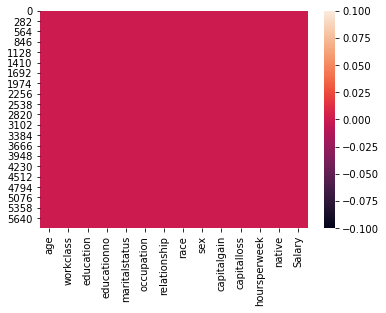

In [4]:
import seaborn as sns
sns.heatmap(df.isnull())

In [5]:
labelencoder=LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1])
df.iloc[:,2]=labelencoder.fit_transform(df.iloc[:,2])
df.iloc[:,4]=labelencoder.fit_transform(df.iloc[:,4])
df.iloc[:,5]=labelencoder.fit_transform(df.iloc[:,5])
df.iloc[:,6]=labelencoder.fit_transform(df.iloc[:,6])
df.iloc[:,7]=labelencoder.fit_transform(df.iloc[:,7])
df.iloc[:,8]=labelencoder.fit_transform(df.iloc[:,8])
df.iloc[:,12]=labelencoder.fit_transform(df.iloc[:,12])
df.iloc[:,13]=labelencoder.fit_transform(df.iloc[:,13])
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,2,11,9,0,4,1,2,1,0,0,40,3,0
1,19,2,11,9,2,1,3,2,1,0,0,40,3,0
2,19,2,11,9,2,1,3,2,1,0,0,40,3,0
3,19,2,11,9,2,1,3,2,1,0,0,40,3,0
4,19,2,11,9,2,1,3,2,1,0,0,40,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            5910 non-null   int64
 1   workclass      5910 non-null   int32
 2   education      5910 non-null   int32
 3   educationno    5910 non-null   int64
 4   maritalstatus  5910 non-null   int32
 5   occupation     5910 non-null   int32
 6   relationship   5910 non-null   int32
 7   race           5910 non-null   int32
 8   sex            5910 non-null   int32
 9   capitalgain    5910 non-null   int64
 10  capitalloss    5910 non-null   int64
 11  hoursperweek   5910 non-null   int64
 12  native         5910 non-null   int32
 13  Salary         5910 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 484.8 KB


<AxesSubplot:xlabel='education'>

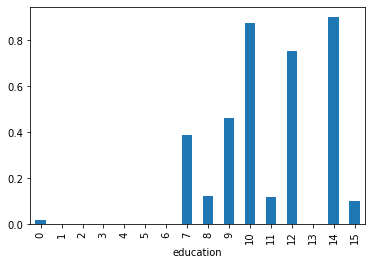

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby('education').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

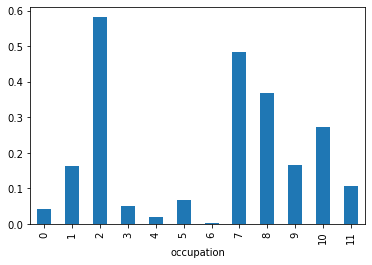

In [10]:
df.groupby('occupation').Salary.mean().plot(kind='bar')


In [11]:
def minmax_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
df=minmax_func(df.iloc[:,0:])
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.42,0.4,0.733333,0.533333,0.00,0.363636,0.2,1.0,1.0,0.0,0.0,0.415584,1.0,0.0
1,0.04,0.4,0.733333,0.533333,0.50,0.090909,0.6,1.0,1.0,0.0,0.0,0.415584,1.0,0.0
2,0.04,0.4,0.733333,0.533333,0.50,0.090909,0.6,1.0,1.0,0.0,0.0,0.415584,1.0,0.0
3,0.04,0.4,0.733333,0.533333,0.50,0.090909,0.6,1.0,1.0,0.0,0.0,0.415584,1.0,0.0
4,0.04,0.4,0.733333,0.533333,0.50,0.090909,0.6,1.0,1.0,0.0,0.0,0.415584,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.88,0.4,0.333333,0.200000,0.25,0.090909,0.0,1.0,1.0,0.0,0.0,0.415584,1.0,0.0
5906,0.56,0.6,0.600000,0.800000,0.25,0.181818,0.0,1.0,1.0,0.0,0.0,0.480519,1.0,1.0
5907,0.30,0.4,1.000000,0.600000,0.50,0.181818,0.6,1.0,1.0,0.0,0.0,0.415584,1.0,0.0
5908,0.32,0.4,0.733333,0.533333,0.00,0.000000,0.8,0.5,0.0,0.0,0.0,0.415584,1.0,0.0


In [13]:
x=df.iloc[:,0:13]
y=df.iloc[:,13]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [15]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4432, 13), (4432,), (1478, 13), (1478,))

In [16]:
# SVC
# Linear
model=SVC(kernel="linear")
model.fit(x_train,y_train)
pred_y=model.predict(x_test)
np.mean(pred_y==y_test)

0.8924221921515562

In [17]:
# Poly Kernel
model1=SVC(kernel="poly")
model1.fit(x_train,y_train)
pred_y1=model1.predict(x_test)
np.mean(pred_y1==y_test)


0.8930987821380244

In [18]:
# RBF Kernel

model2=SVC(kernel="rbf")
model2.fit(x_train,y_train)
pred_y2=model2.predict(x_test)
np.mean(pred_y2==y_test)

0.8924221921515562

In [19]:
# Grid search

clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [20]:
gsv.best_params_,gsv.best_score_

({'C': 12, 'gamma': 10, 'kernel': 'rbf'}, 0.8962087934435564)

In [21]:
clf=SVC(C=15,gamma=0.5)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy: ",acc)

Accuracy:  89.44519621109607


In [22]:
confusion_matrix(y_test,y_pred)

array([[1198,   30],
       [ 126,  124]], dtype=int64)

[[1198   30]
 [ 126  124]]


<AxesSubplot:>

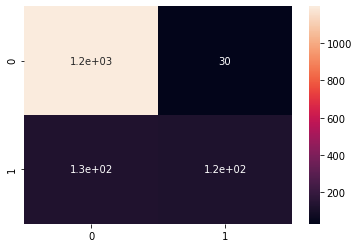

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

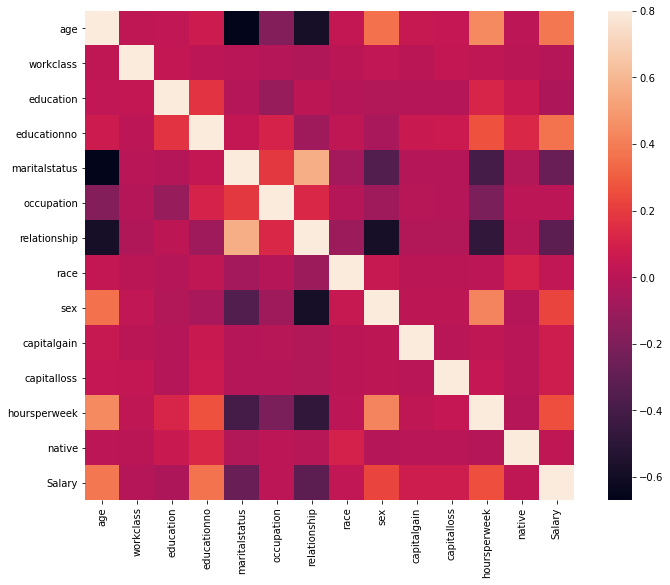

In [30]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

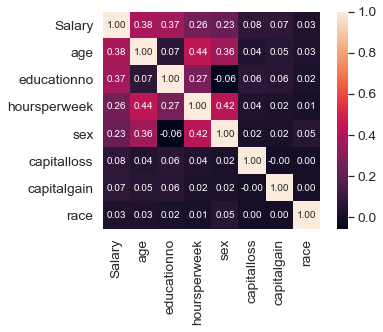

In [32]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [33]:
# Taking only the features that is important for now
X = df[['educationno', 'age']]

# Taking the labels (Income)
Y = df['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.8866328257191202


In [36]:
# Taking only the features that is important for now
X = df[['educationno', 'age', 'hoursperweek', 'capitalgain']]

# Taking the labels (Income)
Y = df['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.8857868020304569


<AxesSubplot:xlabel='race'>

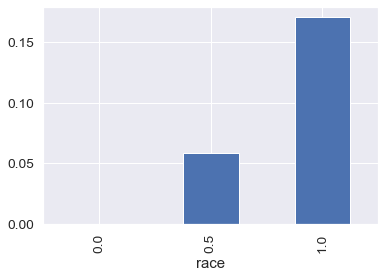

In [38]:
df.groupby('race').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

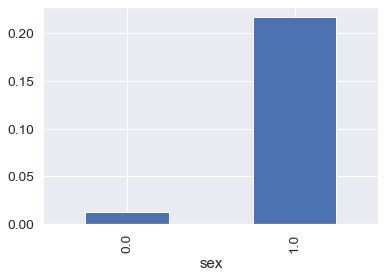

In [40]:
df.groupby('sex').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='age'>

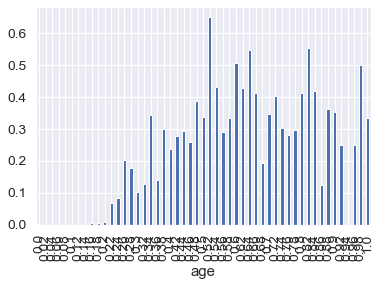

In [41]:
# Mean below 20 years old
df.groupby('age').Salary.mean().plot(kind='bar')


### Conclusion

*Men have more chances to have a higher income

*White and Asian Pacific Islanders have more chances than other races

*Income sort of follows the normal deviation, with a peak at 50 years old